## Dogs vs. Cats
In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.


![](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)

Deep Blue beat Kasparov at chess in 1997.  
Watson beat the brightest trivia minds at Jeopardy in 2011.  
Can you tell Fido from Mittens in 2013?  


## Your task:

1. Train your algorithm on these files and predict the labels (1 = dog, 0 = cat).
2. Deploy your model in herroku ! The user must have the possibility to upload a photo to test the model.

##  Dataset 
````
./dataset/
----> training_set/
--------> dog/
               image1
               image2
               .
               .
--------> cat/
               image1
               image2
               .
               .
----> test_set/
--------> dog/
               image1
               image2
               .
               .
--------> cat/
               image1
               image2
               .
           .
````

To load the dataset uses ImageDataGenerator : 
https://keras.io/preprocessing/image/

In [1]:
# example of loading the cifar10 dataset
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import regularizers
from keras import optimizers 
from keras.optimizers import Adam
import tensorflow as tf
import numpy as np

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # this line is for hiding the futerwarning of tensorflow

In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Organize Data into train, test, prediction dirs
os.chdir('dataset')
if os.path.isdir('training_set/dogs') is False:
    os.makedirs('training_set/dogs')
    os.makedirs('training_set/cats')
    os.makedirs('test_set/dogs')
    os.makedirs('test_set/cats')
    os.makedirs('single_prediction')
    
os.chdir('../')

In [4]:
train_path = 'dataset/training_set'
test_path = 'dataset/test_set'
predictions_path = 'dataset/single_prediction'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
train_batches.class_indices

{'cats': 0, 'dogs': 1}

In [7]:
def model_dog_layers():
 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu')) # Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Conv2D(64,(3, 3), padding='same', activation='relu' )) # Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))    
    
    # Compile model 
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
    return model

cnn_dog = model_dog_layers()

In [8]:
cnn_dog.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [9]:
cnn_dog_cat = cnn_dog.fit(x=train_batches, epochs=10, validation_data=test_batches, verbose=2)

Epoch 1/10
800/800 - 458s - loss: 4.2877 - accuracy: 0.6354 - val_loss: 0.7923 - val_accuracy: 0.6920
Epoch 2/10
800/800 - 451s - loss: 0.3227 - accuracy: 0.8676 - val_loss: 0.8297 - val_accuracy: 0.7035
Epoch 3/10
800/800 - 411s - loss: 0.0968 - accuracy: 0.9706 - val_loss: 0.9964 - val_accuracy: 0.6940
Epoch 4/10
800/800 - 390s - loss: 0.0367 - accuracy: 0.9927 - val_loss: 1.0292 - val_accuracy: 0.7010
Epoch 5/10
800/800 - 390s - loss: 0.0619 - accuracy: 0.9803 - val_loss: 1.1051 - val_accuracy: 0.7005
Epoch 6/10
800/800 - 389s - loss: 0.0904 - accuracy: 0.9724 - val_loss: 1.2210 - val_accuracy: 0.6885
Epoch 7/10
800/800 - 390s - loss: 0.0695 - accuracy: 0.9771 - val_loss: 1.3696 - val_accuracy: 0.6965
Epoch 8/10
800/800 - 389s - loss: 0.0600 - accuracy: 0.9787 - val_loss: 1.3976 - val_accuracy: 0.6940
Epoch 9/10
800/800 - 389s - loss: 0.0479 - accuracy: 0.9834 - val_loss: 1.5682 - val_accuracy: 0.6765
Epoch 10/10
800/800 - 388s - loss: 0.0180 - accuracy: 0.9951 - val_loss: 1.5601 - 

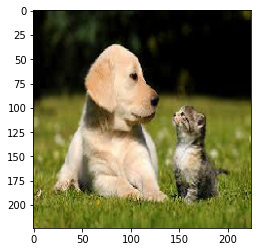

this is dog


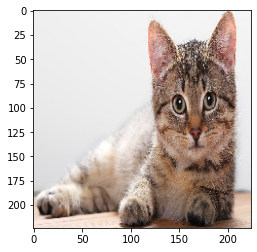

this is dog


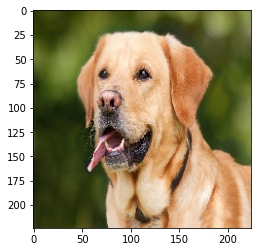

this is dog


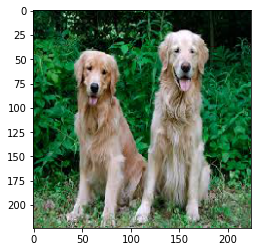

this is dog


In [11]:
dir_path = 'dataset/single_prediction'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = cnn_dog.predict(images)
    if val[0][1] < 0.5:
        print('this is cat')
    else:
        print('this is dog')

In [12]:
scores6l = cnn_dog.evaluate(test_batches, verbose=0)
print("Accuracy: %.2f%%" % (scores6l[1]*100))

Accuracy: 69.35%


In [15]:
# serialize model to JSON
model_json = cnn_dog.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn_dog.save_weights("cnn_dog2.h5")
print("Saved model to disk")
 


Saved model to disk


In [18]:
# later...
from keras.models import model_from_json
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("cnn_dog2.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(test_batches, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 69.35%


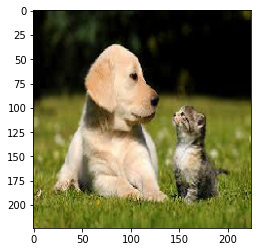

this is dog


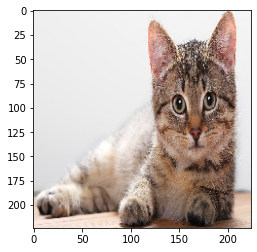

this is dog


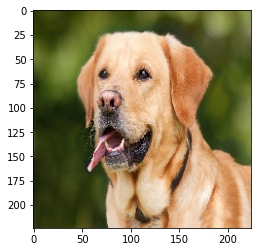

this is dog


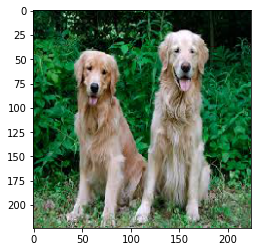

this is dog


In [21]:
dir_path = 'dataset/single_prediction'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = loaded_model.predict(images)
    if val[0][1] < 0.5:
        print('this is cat')
    else:
        print('this is dog')

In [23]:
from keras.models import load_model

# load model
loaded_model_2 = load_model('cnn_dog.h5')

# evaluate loaded model on test data
loaded_model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model_2.evaluate(test_batches, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 69.45%


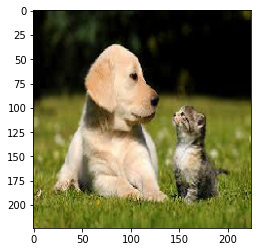

this is dog


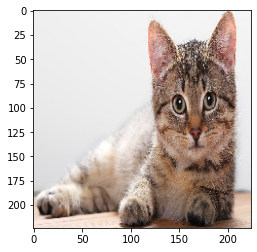

this is cat


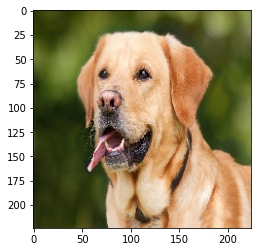

this is dog


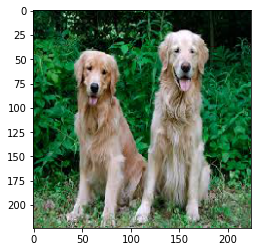

this is dog


In [25]:
dir_path = 'dataset/single_prediction'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(224, 224, 3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = loaded_model_2.predict(images)
    if val[0][1] < 0.5:
        print('this is cat')
    else:
        print('this is dog')